In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd


wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)

In [3]:
print("First five rows of the wine dataset:")
print(X.head())

print("\nDataset description (first few lines):")
print("\n".join(wine_data.DESCR.split('\n')[:28]))

First five rows of the wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
0    14.23        1.71  2.43               15.6      127.0           2.80  \
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue   
0        3.06                  0.28             2.29             5.64  1.04  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted

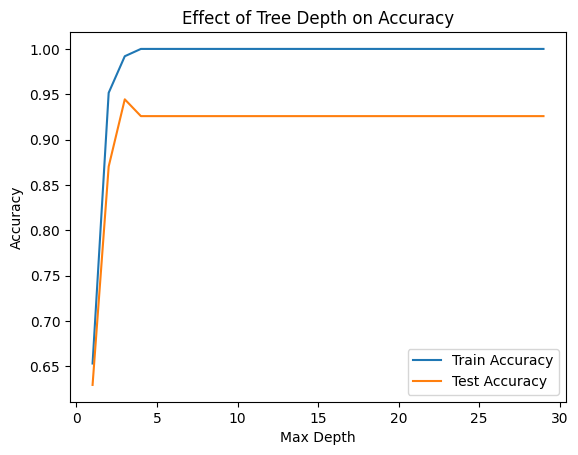

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a Decision Tree model with varying max_depth and record the accuracies
train_accuracies = []
test_accuracies = []
depths = range(1, 30)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))


plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Effect of Tree Depth on Accuracy')
plt.legend()
plt.show()

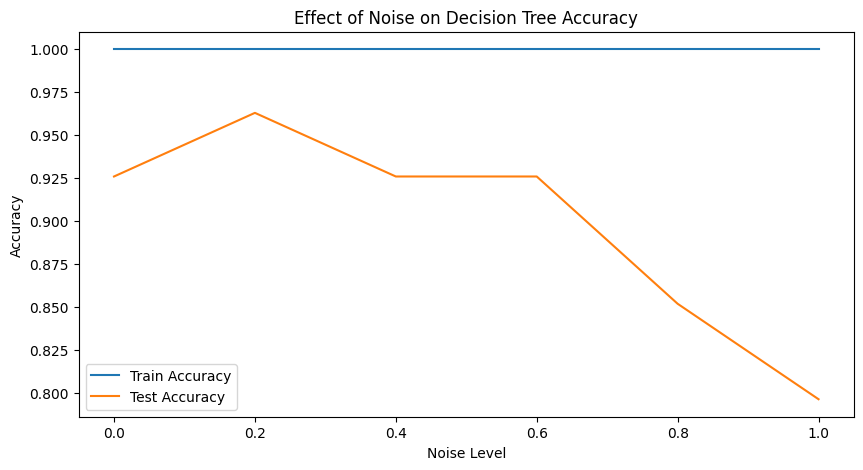

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define a function to add Gaussian noise to the dataset
def add_noise(X, noise_level):
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy = X + noise
    return X_noisy


noise_levels = np.arange(0, 1.01, 0.2)
noise_train_accuracies = []
noise_test_accuracies = []

for noise_level in noise_levels:
    X_train_noisy = add_noise(X_train, noise_level)  # Add noise to the training data
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_noisy, y_train)  # Train the model on the noisy training data
    train_pred = dt.predict(X_train_noisy)
    test_pred = dt.predict(X_test)
    noise_train_accuracies.append(accuracy_score(y_train, train_pred))
    noise_test_accuracies.append(accuracy_score(y_test, test_pred))


plt.figure(figsize=(10, 5))
plt.plot(noise_levels, noise_train_accuracies, label='Train Accuracy')
plt.plot(noise_levels, noise_test_accuracies, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Noise Level')
plt.title('Effect of Noise on Decision Tree Accuracy')
plt.legend()
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")

Random Forest Accuracy: 0.9814814814814815
